## HW 5 Task 3.3

In [1]:
import matplotlib.pyplot as plt
import cv2
import glob
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator,img_to_array
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential,Model
from keras.layers import Input,Conv2D,Activation,BatchNormalization,MaxPooling2D,Flatten,Dense,Dropout,add
from random import sample
from imblearn.under_sampling import RandomUnderSampler

Using TensorFlow backend.


### Loading train and validation image set

In [0]:
batch_size = 128

In [0]:
train_datagen = ImageDataGenerator(rotation_range=40,rescale=1./255,zoom_range=0.2,vertical_flip=True,validation_split=0.2)

In [4]:
train_generator = train_datagen.flow_from_directory(
        '/content/all_images',  # this is the target directory
        target_size=(50, 50),
        batch_size=batch_size,
        class_mode='categorical',subset="training")

Found 4728 images belonging to 2 classes.


In [5]:
validation_generator = train_datagen.flow_from_directory(
        '/content/all_images',  # this is the target directory
        target_size=(50, 50),
        batch_size=batch_size,
        class_mode='categorical',subset="validation")

Found 1180 images belonging to 2 classes.


### CNN Model with residual connections

In [0]:
num_classes = 2
inputs = Input(shape=(50, 50, 3))

In [7]:

conv1 = Conv2D(32, (3, 3), activation='relu',padding='same')(inputs)
conv2 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv1)

maxpool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = Conv2D(32, (3, 3), activation='relu',padding='same')(maxpool2)
conv4 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv3)


skip1 = add([maxpool2, conv4])

conv5 = Conv2D(32, (3, 3), activation='relu',padding='same')(skip1)
conv6 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv5)

maxpool6 = MaxPooling2D(pool_size=(2, 2))(conv6)

conv7 = Conv2D(32, (3, 3), activation='relu',padding='same')(maxpool6)
conv8 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv7)


skip2 = add([maxpool6, conv8])

conv9 = Conv2D(32, (3, 3), activation='relu',padding='same')(skip2)
conv10 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv9)

maxpool9 = MaxPooling2D(pool_size=(2, 2))(conv10)

conv11 = Conv2D(32, (3, 3), activation='relu',padding='same')(maxpool9)
conv12 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv11)

skip3 = add([maxpool9, conv12])

conv13 = Conv2D(32, (3, 3), activation='relu',padding='same')(skip3)
conv14 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv13)

maxpool10 = MaxPooling2D(pool_size=(2, 2))(conv14)

conv15 = Conv2D(32, (3, 3), activation='relu',padding='same')(maxpool10)
conv16 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv15)

skip4 = add([maxpool10, conv16])

conv17 = Conv2D(32, (3, 3), activation='relu',padding='same')(skip4)
conv18 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv17)

maxpool11 = MaxPooling2D(pool_size=(2, 2))(conv18)

conv19 = Conv2D(32, (3, 3), activation='relu',padding='same')(maxpool11)
conv20 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv19)

skip5 = add([maxpool11, conv20])


flat = Flatten()(skip5)
dense9=Dense(16,activation='relu')(flat)
predictions=Dense(2,activation='softmax')(dense9)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model = Model(inputs=inputs, outputs=predictions)

In [0]:
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [10]:
fitted = model.fit_generator(train_generator, steps_per_epoch=200, epochs=20,validation_data=validation_generator,validation_steps=80)


Instructions for updating:
Use tf.cast instead.
Epoch 1/20
200/200 [==============================] - 64s 318ms/step - loss: 0.6907 - acc: 0.5127 - val_loss: 0.6930 - val_acc: 0.5000
Epoch 2/20
200/200 [==============================] - 56s 280ms/step - loss: 0.6028 - acc: 0.6561 - val_loss: 0.5031 - val_acc: 0.7974
Epoch 3/20
200/200 [==============================] - 58s 289ms/step - loss: 0.4963 - acc: 0.7742 - val_loss: 0.4505 - val_acc: 0.8029
Epoch 4/20
200/200 [==============================] - 59s 293ms/step - loss: 0.4707 - acc: 0.7866 - val_loss: 0.4365 - val_acc: 0.8074
Epoch 5/20
200/200 [==============================] - 57s 285ms/step - loss: 0.4470 - acc: 0.7994 - val_loss: 0.4097 - val_acc: 0.8160
Epoch 6/20
200/200 [==============================] - 57s 284ms/step - loss: 0.4431 - acc: 0.8022 - val_loss: 0.4175 - val_acc: 0.8235
Epoch 7/20
200/200 [==============================] - 57s 286ms/step - loss: 0.4311 - acc: 0.8044 - val_loss: 0.4483 - val_acc: 0.8083
Epoch 8

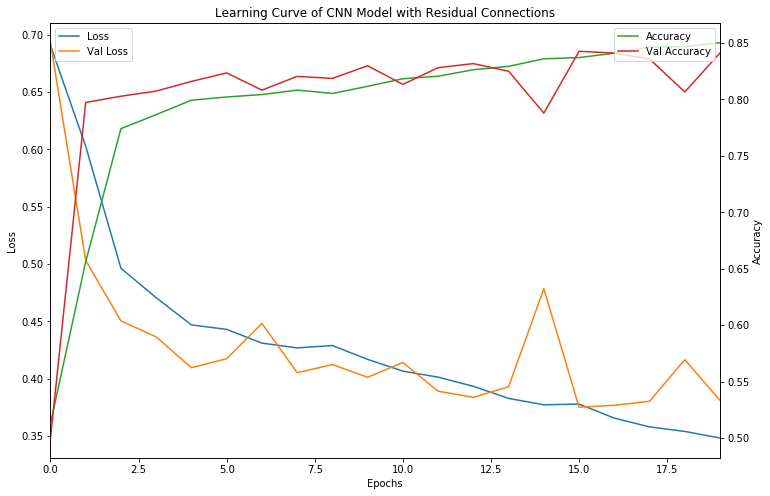

In [11]:
df = pd.DataFrame(fitted.history)
plt.figure(figsize=(12,8))
plt.xlabel('Epochs')
plt.title('Learning Curve of CNN Model with Residual Connections')

ax1 = df['loss'].plot( label='Loss')
ax1 = df['val_loss'].plot( label='Val Loss')
ax2 = df['acc'].plot(secondary_y=True, label='Accuracy')
ax2 = df['val_acc'].plot(secondary_y=True, label='Val Accuracy')

ax1.set_ylabel('Loss')
ax2.set_ylabel('Accuracy')
ax1.legend(loc=2)
ax2.legend(loc=1)

plt.show()

### CNN Model without residual connections

In [0]:

conv1 = Conv2D(32, (3, 3), activation='relu',padding='same')(inputs)
conv2 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv1)

maxpool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = Conv2D(32, (3, 3), activation='relu',padding='same')(maxpool2)
conv4 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv3)


conv5 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv4)
conv6 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv5)

maxpool6 = MaxPooling2D(pool_size=(2, 2))(conv6)

conv7 = Conv2D(32, (3, 3), activation='relu',padding='same')(maxpool6)
conv8 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv7)


conv9 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv8)
conv10 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv9)

maxpool9 = MaxPooling2D(pool_size=(2, 2))(conv10)

conv11 = Conv2D(32, (3, 3), activation='relu',padding='same')(maxpool9)
conv12 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv11)


conv13 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv12)
conv14 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv13)

maxpool10 = MaxPooling2D(pool_size=(2, 2))(conv14)

conv15 = Conv2D(32, (3, 3), activation='relu',padding='same')(maxpool10)
conv16 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv15)


conv17 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv16)
conv18 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv17)

maxpool11 = MaxPooling2D(pool_size=(2, 2))(conv18)

conv19 = Conv2D(32, (3, 3), activation='relu',padding='same')(maxpool11)
conv20 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv19)


flat = Flatten()(conv20)
dense9=Dense(16,activation='relu')(flat)
predictions=Dense(2,activation='softmax')(dense9)

In [0]:
model_wo_skip = Model(inputs=inputs, outputs=predictions)

In [0]:
model_wo_skip.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [15]:
fitted_wo_skip = model_wo_skip.fit_generator(train_generator, steps_per_epoch=200, epochs=20,validation_data=validation_generator,validation_steps=80)

Epoch 1/20
200/200 [==============================] - 59s 296ms/step - loss: 0.6931 - acc: 0.5047 - val_loss: 0.6932 - val_acc: 0.4997
Epoch 2/20
200/200 [==============================] - 59s 296ms/step - loss: 0.6932 - acc: 0.4919 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 3/20
200/200 [==============================] - 55s 276ms/step - loss: 0.6932 - acc: 0.4946 - val_loss: 0.6931 - val_acc: 0.5003
Epoch 4/20
200/200 [==============================] - 36s 178ms/step - loss: 0.6932 - acc: 0.4964 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 5/20
200/200 [==============================] - 37s 185ms/step - loss: 0.6932 - acc: 0.4975 - val_loss: 0.6931 - val_acc: 0.5007
Epoch 6/20
200/200 [==============================] - 36s 178ms/step - loss: 0.6932 - acc: 0.4933 - val_loss: 0.6931 - val_acc: 0.4998
Epoch 7/20
200/200 [==============================] - 37s 185ms/step - loss: 0.6932 - acc: 0.4934 - val_loss: 0.6931 - val_acc: 0.5005
Epoch 8/20
200/200 [==============================] - 3

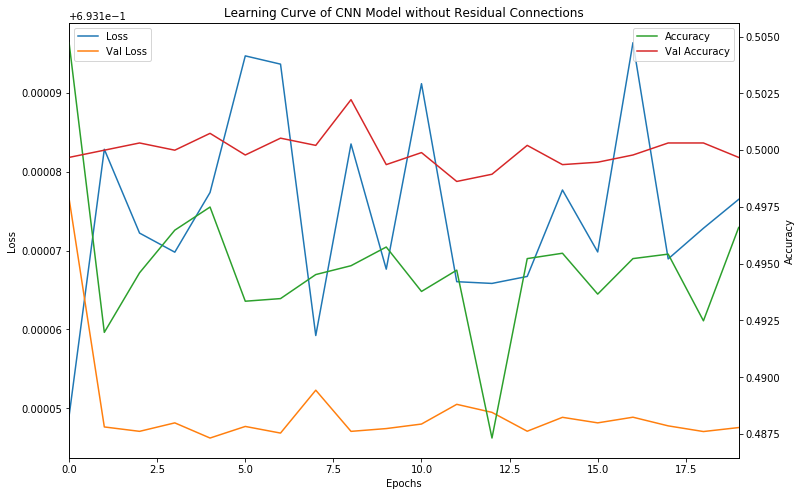

In [16]:
df = pd.DataFrame(fitted_wo_skip.history)
plt.figure(figsize=(12,8))
plt.xlabel('Epochs')
plt.title('Learning Curve of CNN Model without Residual Connections')

ax1 = df['loss'].plot( label='Loss')
ax1 = df['val_loss'].plot( label='Val Loss')
ax2 = df['acc'].plot(secondary_y=True, label='Accuracy')
ax2 = df['val_acc'].plot(secondary_y=True, label='Val Accuracy')

ax1.set_ylabel('Loss')
ax2.set_ylabel('Accuracy')
ax1.legend(loc=2)
ax2.legend(loc=1)

plt.show()

### The model with skip connections learns better with a score of 0.84 on the validation set. The model without skip connections has a score of 0.49 which remains almost constant(between 0.48 - 0.50) through all the epochs.

- The validation score is only slightly greater than the train score for the CNN model without skip connections as such a deep model with 25 hidden layers(20 Convolutional layers and 5 maxpooling layers) cannot learn on the dataset without skip connections.